Create Player Ratings

In [1]:
import sys
sys.path.append("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from player_ratings import *

import os
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [3]:
import matplotlib.font_manager as fm

font_path = "/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/viz/fonts"
for x in os.listdir(font_path):
    if x != ".DS_Store":
        for y in os.listdir(f"{font_path}/{x}"):
            if y.split(".")[-1] == "ttf":
                fm.fontManager.addfont(f"{font_path}/{x}/{y}")
                try:
                    fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
                except Exception:
                    continue
plt.style.use("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/viz/mplstyle/dark_theme.mplstyle")

In [4]:
player_stats = pd.read_csv("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/data/player_stats.csv")
player_stats['Season'] = player_stats['Match_ID'].apply(lambda x: int(x[:4]))
player_stats['Player_Season'] = player_stats['Player'] + "_" + player_stats['Season'].astype(str)

player_stats['Score'] = player_stats['Behinds'] + player_stats['Goals']*6
player_stats['xScore_Diff'] = player_stats['Score'] - player_stats['xScore']

player_stats.head()

,Match_ID,Team,Player,Round_ID,AFL_API_Player_ID,Player_Type,playerId,Age,Height,Weight,Number,Kicking_Foot,State_Of_Origin,Draft_Year,Debut_Year,Recruited_From,Draft_Position,Draft_Type,Photo_URL,Date_Of_Birth,Percent_Played,Behinds,Bounces,Centre_Bounces_Attended,Centre_Clearances,Clangers,Defensive_Contest_Losses,Defensive_Contest_Loss_Percentage,Defensive_One_On_One_Contests,Contested_Marks,Contested_Possession_Rate,Contested_Possessions,Offensive_One_On_One_Contests,Offensive_Contest_Wins,Offensive_Contest_Win_Percentage,Defensive_Half_Pressure_Acts,Disposal_Efficiency,Disposals,AFL_Fantasy_Points,Effective_Disposals,Effective_Kicks,Inside_50_Ground_Ball_Gets,Frees_Against,Frees_For,Goal_Accuracy,Goal_Assists,Goals,Ground_Ball_Gets,Handballs,Hit_Outs,Hit_Outs_To_Advantage,Hit_Outs_To_Advantage_Rate,Hit_Out_Win_Percentage,Inside_50s,Intercept_Marks,Intercepts,Kick_Efficiency,Kick_Ins,Kick_Ins_Played_On,Kicks,Kick_To_Handball_Ratio,Marks,Marks_Inside_50,Marks_On_Lead,Metres_Gained,One_Percenters,Pressure_Acts,Player_Rating_Points,Rebound_50s,Ruck_Contests,Score_Involvements,Score_Launches,Shots_At_Goal,Spoils,Stoppage_Clearances,Tackles,Tackles_Inside_50,Clearances,Possessions,Turnovers,Uncontested_Possessions,AFLCA_Player_ID,Coaches_Votes,Position,Team_Status,Position_Sub_Group,Position_Group,Year,Brownlow_Votes,Season,xScore,xT_created,xT_denied,vaep_value,offensive_value,defensive_value,exp_vaep_value,exp_offensive_value,exp_defensive_value,xT_received,xT_prevented,vaep_value_received,exp_vaep_value_received,Player_Season,Score,xScore_Diff
0,202101_BrisbaneLions_Sydney,Brisbane Lions,Brandon Starcevich,202101,Brandon_Starcevich,MEDIUM_DEFENDER,CD_I1002401,22,187,92,37,RIGHT,WA,2017.0,2018.0,Mt Lawley-Inglewood (WA)/Trinity Coll (WA)/Eas...,18.0,nationalDraft,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1999-07-24,84,0,1.0,0.0,0,1,1.0,100.0,1.0,1,55.6,5,0.0,0.0,0.0,4.0,88.9,9,31,8.0,5.0,0.0,0,1,0.0,0,0,3.0,3,0,0.0,0.0,0.0,0,1.0,4,83.3,0.0,0.0,6,2.0,2,0,1.0,172.0,1,5.0,6.1,2,0.0,4,1.0,0,1.0,1,0,0,1,9,2,4,NaN,NaN,Half Back Flank Left,FINAL_TEAM,Half-Back,Back,2021.0,0.0,2021,0.000000,-0.235667,0.000000,0.711460,0.026457,0.685004,3.362637,0.585132,2.777505,-0.461340,0.190552,0.329877,2.328707,Brandon Starcevich_2021,0,0.000000
1,202101_BrisbaneLions_Sydney,Brisbane Lions,Callum Ah Chee,202101,Callum_Ah_Chee,MEDIUM_DEFENDER,CD_I298437,24,183,79,4,RIGHT,WA,2015.0,2016.0,Kelmscott (WA)/South Fremantle (WAFL)/Gold Coast,8.0,nationalDraft,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1997-10-09,87,0,0.0,0.0,0,4,1.0,100.0,1.0,0,66.7,8,0.0,0.0,0.0,5.0,83.3,12,36,10.0,5.0,0.0,2,0,0.0,1,0,8.0,6,0,0.0,0.0,0.0,2,0.0,7,83.3,1.0,1.0,6,1.0,0,0,0.0,258.0,2,7.0,8.0,1,0.0,2,1.0,0,2.0,0,3,1,0,12,6,4,NaN,NaN,Interchange,FINAL_TEAM,Interchange,Interchange,2021.0,0.0,2021,0.000000,-0.075963,0.010892,0.291451,0.479986,-0.188535,1.318957,1.031427,0.287530,-0.487945,-0.039690,0.608221,3.269039,Callum Ah Chee_2021,0,0.000000
2,202101_BrisbaneLions_Sydney,Brisbane Lions,Charlie Cameron,202101,Charlie_Cameron,MEDIUM_FORWARD,CD_I990609,27,180,75,23,RIGHT,WA,2014.0,2014.0,Newman Saints (WA)/Swan Districts (WAFL)/Adelaide,NaN,rookieElevation,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1994-07-05,77,0,0.0,9.0,3,0,0.0,0.0,0.0,0,50.0,5,0.0,0.0,0.0,3.0,70.0,10,39,7.0,4.0,0.0,0,2,0.0,1,0,1.0,3,0,0.0,0.0,0.0,3,0.0,1,57.1,0.0,0.0,7,2.3,2,1,2.0,207.0,1,9.0,10.1,0,0.0,4,1.0,0,0.0,0,1,0,3,10,0,5,NaN,NaN,Forward Pocket Right,FINAL_TEAM,Forward-Pocket,Forward,2021.0,0.0,2021,0.000000,0.460322,-0.166355,0.696752,0.681301,0.015451,6.034727,5.882581,0.152147,0.197894,-0.035491,0.859897,8.186274,Charlie Cameron_2021,0,0.000000
3,202101_BrisbaneLions_Sydney,Brisbane Lions,Daniel Rich,202101,Daniel_Rich,MEDIUM_DEFENDER,CD_I271072,31,183,95,10,LEFT,WA,2008.0,2009.0,Sorrento-Duncraig (WA)/Subiaco (WAFL),7.0,nationalDraft,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1990-06-07,84,0,0.0,0.0,0,4,1.0,50.0,2.0,0,12.5,2,0.0,0.0,0.0,5.0,60.9,23,95,14.0,12.0,0.0

In [5]:
player_stats[['Position_Group', 'Position_Sub_Group']].value_counts().sort_index()

Position_Group  Position_Sub_Group
Back            Back-Pocket           2249
                Half-Back             2231
                Key-Back              2246
Forward         Forward-Pocket        2233
                Half-Forward          2208
                Key-Forward           2247
Interchange     Interchange           5463
Midfield        Centre                3354
                Wing                  2191
Ruck            Ruck                  1148
dtype: int64

In [6]:
SELECTED_POSITION = "Back"

position_role_stats = {
    'goal_preventing' : [
        'Defensive_Half_Pressure_Acts',
        'Pressure_Acts',
        'Spoils',
        'Tackles',
        'Clearances',
        'defensive_value',
        'exp_defensive_value'
    ],
    'ball_denial' : [
        'Rebound_50s',
        'Intercepts',
        'xT_prevented',
        'defensive_value',
        'exp_defensive_value'
    ],
    'contest' : [
        'Contested_Marks',
        'Contested_Possessions',
        'Defensive_Contest_Losses',
        'Defensive_One_On_One_Contests',
        'Ground_Ball_Gets',
        'Stoppage_Clearances',
        'Possessions',
        'Uncontested_Possessions'
    ]}

In [7]:
position_summary, position_role_stats_zscaled = create_position_summary(player_stats, SELECTED_POSITION, position_role_stats)
selected_position_rating = get_selected_position_rating(SELECTED_POSITION)
position_summary.sort_values(by=selected_position_rating, ascending=False).head(10)

Games        Age  Height  \
Player         Team                   Season                             
Sam Taylor     Greater Western Sydney 2023       11  24.000000   198.0   
                                      2021       18  22.000000   196.0   
Dan Houston    Port Adelaide          2023       19  26.000000   186.0   
Sam Taylor     Greater Western Sydney 2022       22  22.681818   196.0   
James Sicily   Hawthorn               2023       14  28.000000   188.0   
Harris Andrews Brisbane Lions         2021       23  25.000000   202.0   
Jack Crisp     Collingwood            2021       11  28.000000   190.0   
Dan Houston    Port Adelaide          2022       12  25.000000   186.0   
Tom Stewart    Geelong                2022       20  29.000000   190.0   
Tom Doedee     Adelaide               2021       20  24.000000   187.0   

                                              Weight  Debut_Year  \
Player         Team                   Season                       
Sam Taylor     Greater Western Sydney 2023      95.0      2018.0   
                                      2021      96.0      2018.0   
Dan Houston    Port Adelaide          2023      88.0      2017.0   
Sam Taylor     Greater Western Sydney 2022      95.0      2018.0   
James Sicily   Hawthorn               2023      90.0      2015.0   
Harris Andrews Brisbane Lions         2021      98.0      2015.0   
Jack Crisp     Collingwood            2021      90.0      2012.0   
Dan Houston    Port Adelaide          2022      88.0      2017.0   
Tom Stewart    Geelong                2022      88.0      2017.0   
Tom Doedee     Adelaide               2021      89.0      2018.0   

                                              Draft_Position  \
Player         Team                   Season                   
Sam Taylor     Greater Western Sydney 2023              28.0   
                                      2021              28.0   
Dan Houston    Port Adelaide          2023              45.0   
Sam Taylor     Greater Western Sydney 2022              28.0   
James Sicily   Hawthorn               2023              56.0   
Harris Andrews Brisbane Lions         2021              61.0   
Jack Crisp     Collingwood            2021              86.0   
Dan Houston    Port Adelaide          2022              45.0   
Tom Stewart    Geelong                2022              40.0   
Tom Doedee     Adelaide               2021              17.0   

                                              Ground_Ball_Gets_sum  \
Player         Team                   Season                         
Sam Taylor     Greater Western Sydney 2023                    50.0   
                                      2021                    73.0   
Dan Houston    Port Adelaide          2023                   118.0   
Sam Taylor     Greater Western Sydney 2022                   106.0   
James Sicily   Hawthorn               2023                    77.0   
Harris Andrews Brisbane Lions         2021                    91.0   
Jack Crisp     Collingwood            2021                    74.0   
Dan Houston    Port Adelaide          2022                    40.0   
Tom Stewart    Geelong                2022                    84.0   
Tom Doedee     Adelaide               2021                    88.0   

                                              exp_defensive_value_sum  \
Player         Team                   Season                            
Sam Taylor     Greater Western Sydney 2023                  76.556398   
                                      2021                  96.752669   
Dan Houston    Port Adelaide          2023                  21.758818   
Sam Taylor     Greater Western Sydney 2022                 112.327113   
James Sicily   Hawthorn               2023                  48.455914   
Harris Andrews Brisbane Lions         2021                 127.636113   
Jack Crisp     Collingwood            2021                  18.765317   
Dan Houston    Port Adelaide          2022                  35.088936   


In [8]:
players = create_player_rating_by_season(position_summary, SELECTED_POSITION, position_role_stats_zscaled)
players.sort_values(by='overall_'+selected_position_rating, ascending=False).head(20)

back_rating                      \
Season                                        2021      2022      2023   
Player          Team                                                     
Sam Taylor      Greater Western Sydney    1.117842  1.028342  1.555123   
Dan Houston     Port Adelaide             0.133042  0.898302  1.092853   
James Sicily    Hawthorn                  0.000000  0.732304  0.995850   
Tom Stewart     Geelong                   0.558268  0.829370  0.750831   
Nick Vlastuin   Richmond                  0.396961  0.707958  0.593715   
Jack Sinclair   St Kilda                  0.239992  0.377623  0.683087   
Darcy Moore     Collingwood               0.000000  0.456983  0.597666   
Luke Ryan       Fremantle                 0.158276  0.539423  0.448273   
Jack Buckley    Greater Western Sydney    0.158529  0.000000  0.689804   
Aliir Aliir     Port Adelaide             0.567022  0.215380  0.493870   
Tom Doedee      Adelaide                  0.755759  0.232867  0.387983   
Tom Barrass     West Coast                0.193755  0.609773  0.281390   
Charlie Ballard Gold Coast                0.074780  0.120543  0.511444   
Brennan Cox     Fremantle                 0.243819  0.368920  0.358357   
Brayden Maynard Collingwood               0.282496  0.570114  0.207484   
Sam Collins     Gold Coast                0.591264  0.308048  0.276450   
Ed Richards     Western Bulldogs          0.000000  0.069591  0.436382   
Trent Rivers    Melbourne                 0.000000  0.000000  0.470527   
Harris Andrews  Brisbane Lions            0.928722  0.053442  0.262429   
Adam Saad       Carlton                   0.150100  0.328971  0.249672   

                                       overall_back_rating  
Season                                                      
Player          Team                                        
Sam Taylor      Greater Western Sydney            1.353361  
Dan Houston     Port Adelaide                     0.938507  
James Sicily    Hawthorn                          0.817201  
Tom Stewart     Geelong                           0.755136  
Nick Vlastuin   Richmond                          0.608313  
Jack Sinclair   St Kilda                          0.547138  
Darcy Moore     Collingwood                       0.495695  
Luke Ryan       Fremantle                         0.446618  
Jack Buckley    Greater Western Sydney            0.429735  
Aliir Aliir     Port Adelaide                     0.417638  
Tom Doedee      Adelaide                          0.378226  
Tom Barrass     West Coast                        0.371141  
Charlie Ballard Gold Coast                        0.350508  
Brennan Cox     Fremantle                         0.350072  
Brayden Maynard Collingwood                       0.323774  
Sam Collins     Gold Coast                        0.317411  
Ed Richards     Western Bulldogs                  0.282706  
Trent Rivers    Melbourne                         0.282316  
Harris Andrews  Brisbane Lions                    0.266362  
Adam Saad       Carlton                           0.263505

Visualise

In [9]:
# display_histograms(position_summary, nrows=9, ncols=4, stats=position_stats_zscaled)

In [10]:
roles = list(position_role_stats_zscaled.keys())
role_ratings = [x+"_rating" for x in roles]
stats_list = []
for role in roles:
    stats_list.append([role+"_rating"] + position_role_stats_zscaled[role]) 

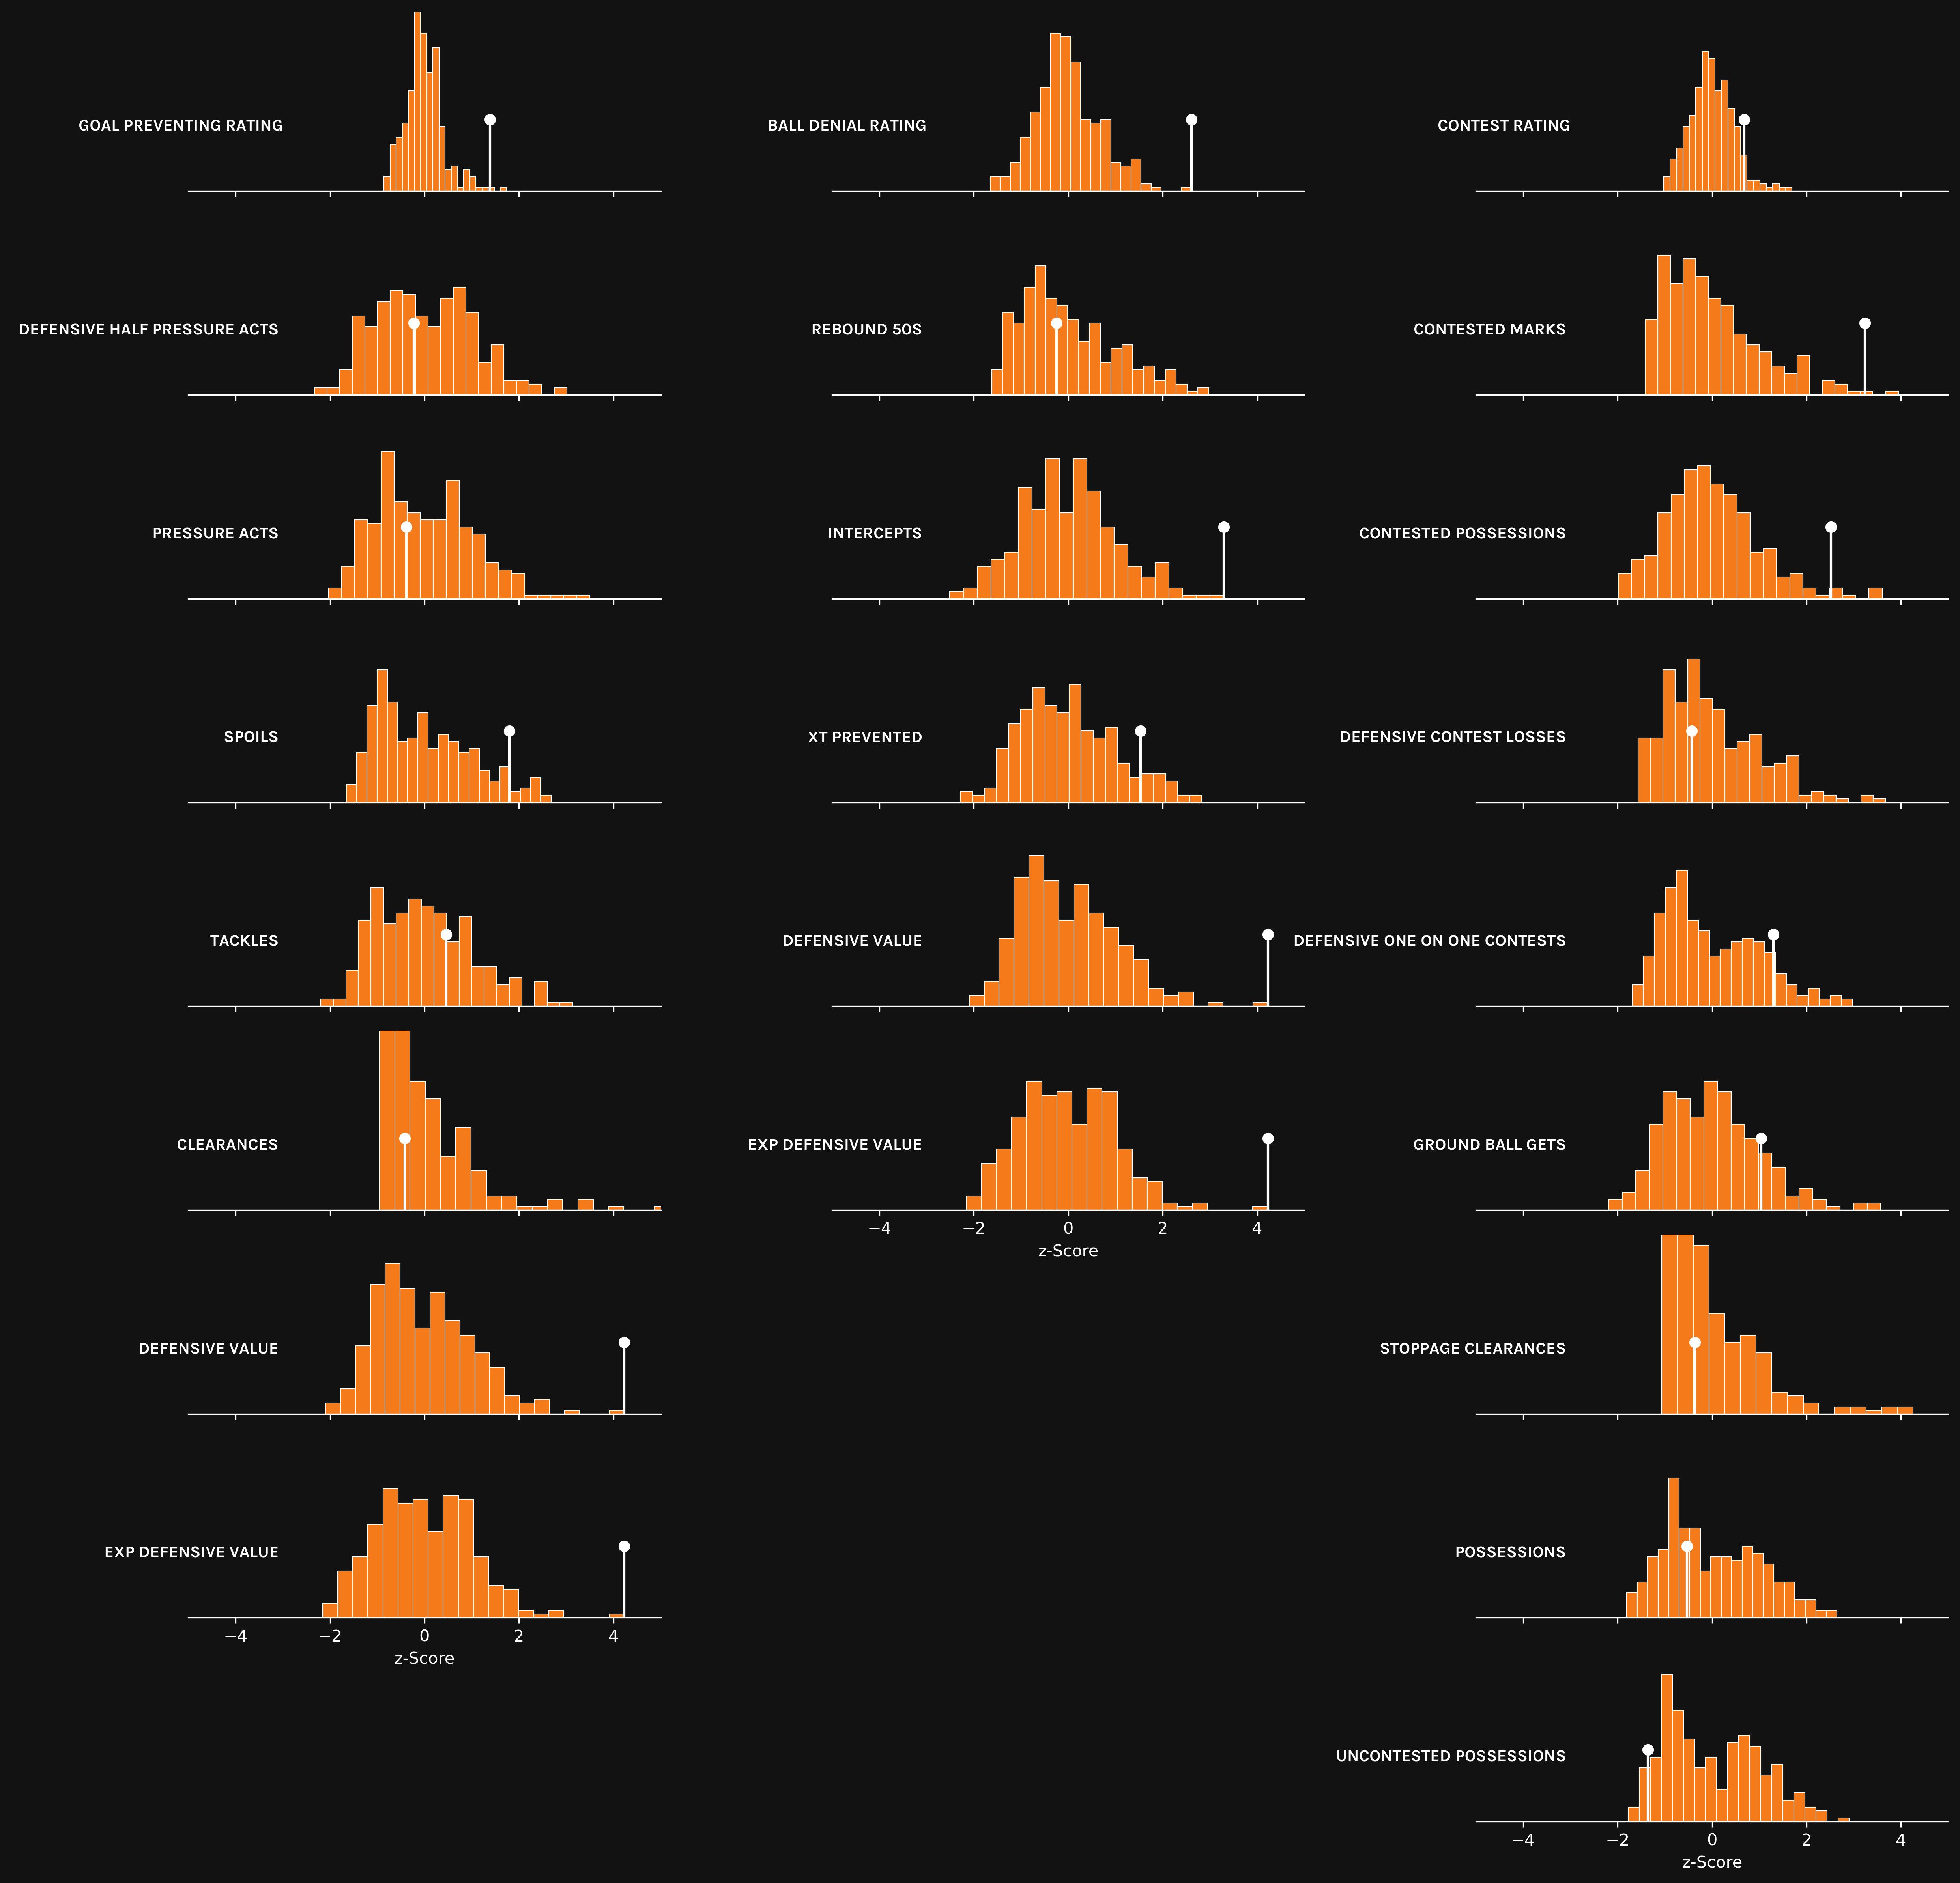

In [12]:
player = "Sam Taylor"
team = "Greater Western Sydney"
season = 2023

fig, axs = plot_multiple_role_histograms(position_summary, stats_list, player, team, season, 
                                         xlim=5, ylim = 50, figsize=(20,20), stat_fontsize=10, ticksize=10,
                                         stem_markersize = 6, stem_colour="w")

In [ ]:
player = "Jack Sinclair"
team = "St Kilda"
season = 2022

for role in position_role_stats_zscaled.keys():
    stats = position_role_stats_zscaled[role] + [role+'_rating']
    fig, ax = player_stats_histograms(position_summary, player, team, season, stats)
    
stats = [x+"_rating" for x in list(position_role_stats_zscaled.keys())] + [selected_position_rating]
fig, ax = player_stats_histograms(position_summary, player, team, season, stats, figsize=(8, 6), xlim=3, xlabel = "Rating")
    